<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
:پروژه ی ششم
</font>
</h1>
<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اعمال فیلتر های مختلف بر روی عکس
</font>
</h1>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color="orange">
  عرشیا ربیعی 
    
</font> 
</p>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color="orange">
۶۱۰۳۹۸۱۲۵ 
    
</font> 
</p>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from PIL import Image



In [5]:
np.random.seed(42)
INFINITY = 1e9

In [6]:

image = Image.open("Lena.PNG")
image = image.convert("L")
image = image.resize((128,128))
img_gray = np.array(image)
img_gray

array([[162, 161, 161, ..., 120, 163, 163],
       [160, 159, 159, ..., 126, 129, 101],
       [157, 156, 157, ..., 103,  56,  43],
       ...,
       [ 53,  55,  59, ...,  57,  53,  62],
       [ 51,  53,  54, ...,  58,  70,  88],
       [ 48,  51,  50, ...,  68,  91, 102]], dtype=uint8)

In [7]:
img_gray

array([[162, 161, 161, ..., 120, 163, 163],
       [160, 159, 159, ..., 126, 129, 101],
       [157, 156, 157, ..., 103,  56,  43],
       ...,
       [ 53,  55,  59, ...,  57,  53,  62],
       [ 51,  53,  54, ...,  58,  70,  88],
       [ 48,  51,  50, ...,  68,  91, 102]], dtype=uint8)

# DOG Filter

In [8]:
class Dog:
    def __init__(self , sigma1 , sigma2 , kernel_size , stride=1):
        self.s1 = sigma1
        self.s2 = sigma2
        self.kernel_size = kernel_size
        self.stride = stride
        self.pad = (self.kernel_size[0] - 1)//2
    def dog_filter(self):
        (y ,x) = np.meshgrid(np.arange(int(-self.kernel_size[0]/2) , (self.kernel_size[0])//2 + 1) , np.arange(int(-self.kernel_size[1]/2) ,(self.kernel_size[1])//2 + 1))
        xy = -0.5 * ((x**2 + y ** 2))
        return (np.exp(xy/self.s1 **2)/self.s1 - np.exp(xy/self.s2**2)/self.s2) / np.sqrt(2 * np.pi)
    def get_filt(self , oncenter):
        if oncenter:
            filt = self.dog_filter()
        else:
            filt = -self.dog_filter()
        return filt
    def dog_apply(self , img , oncenter = True):
        filt = self.get_filt(oncenter)
        plt.imshow(filt ,cmap='gray');
        result = np.zeros(img.shape)
        pad_img = np.pad(img , pad_width=self.pad)
        for i in range(0 , len(pad_img) - self.kernel_size[0]+1 , self.stride):
            for j in range(0 , len(pad_img) - self.kernel_size[1]+1 , self.stride):
                result[i , j] = np.sum( (pad_img[i: i + self.kernel_size[0], j : j + self.kernel_size[1]]) * filt)
        result -= result.min()
        result /= result.max()
        result *= 255
        return result
    def ttfs(self, img):
        ttfs = []
        img_copy = img.copy()
        i = 0
        ttfs.append(np.zeros((img_copy.shape[0] , img_copy.shape[1])))
        while img_copy.max() != -INFINITY:
            tmp_max = img_copy.max()
            flat_max_index = img_copy.argmax()
            j = flat_max_index // img_copy.shape[1]
            k = flat_max_index % img_copy.shape[0]
            ttfs[i][j , k] = 1
            img_copy[j,k] = -INFINITY
            if tmp_max != img_copy.max():
                ttfs.append(np.zeros((img_copy.shape[0] , img_copy.shape[1])))
                i += 1
        ttfs = np.array(ttfs)
        return ttfs
    def scatter_array(self , ttfs):
        ttfs_reshape = ttfs.reshape(ttfs.shape[0] , ttfs.shape[1] * ttfs.shape[2])
        x = []
        y = []
        for i in range(ttfs_reshape.shape[0]):
            for j in range(ttfs_reshape.shape[1]):
                if ttfs_reshape[i , j] == 1:
                    x.append(i)
                    y.append(j)
        return x , y

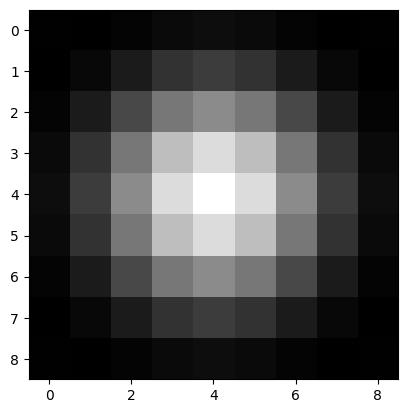

In [9]:
dog = Dog(2 , 5 , (9,9))
on_center = dog.dog_apply(img_gray, oncenter=True)

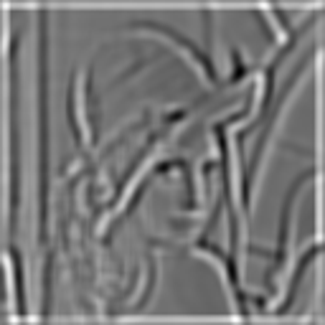

In [10]:
Image.fromarray(np.array(on_center).astype(np.uint8)).resize((325 ,325))

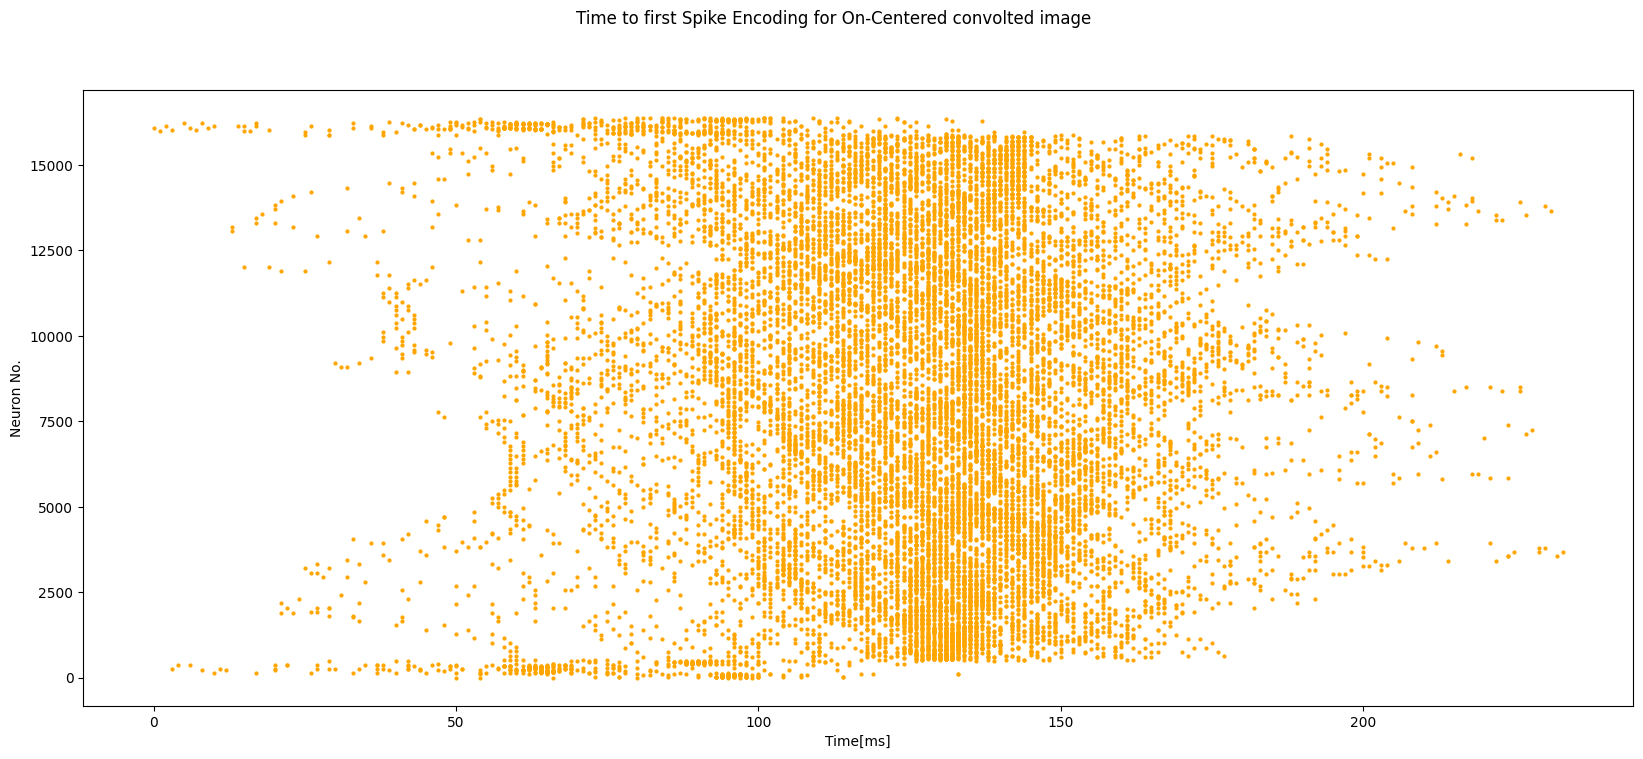

In [11]:
ttfs_oncenter = dog.ttfs(on_center.astype(int))
x , y =dog.scatter_array(ttfs_oncenter)
fig , ax = plt.subplots(1, figsize=(20, 8))
ax.scatter(x , y , s = 4 , color = 'orange');
fig.suptitle('Time to first Spike Encoding for On-Centered convolted image')
ax.set_xlabel('Time[ms]')
ax.set_ylabel('Neuron No.');

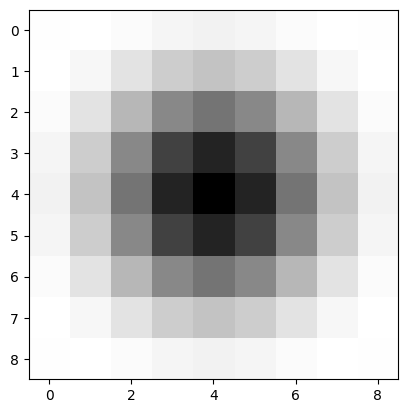

In [12]:
dog = Dog(2 , 5 , (9,9))
off_center = dog.dog_apply(img_gray, oncenter=False)

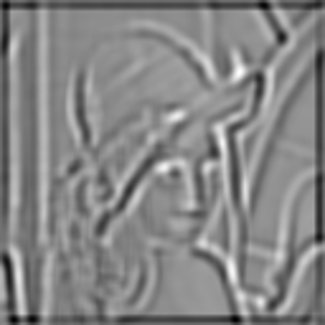

In [13]:
Image.fromarray(np.array(off_center).astype(np.uint8)).resize((325,325))

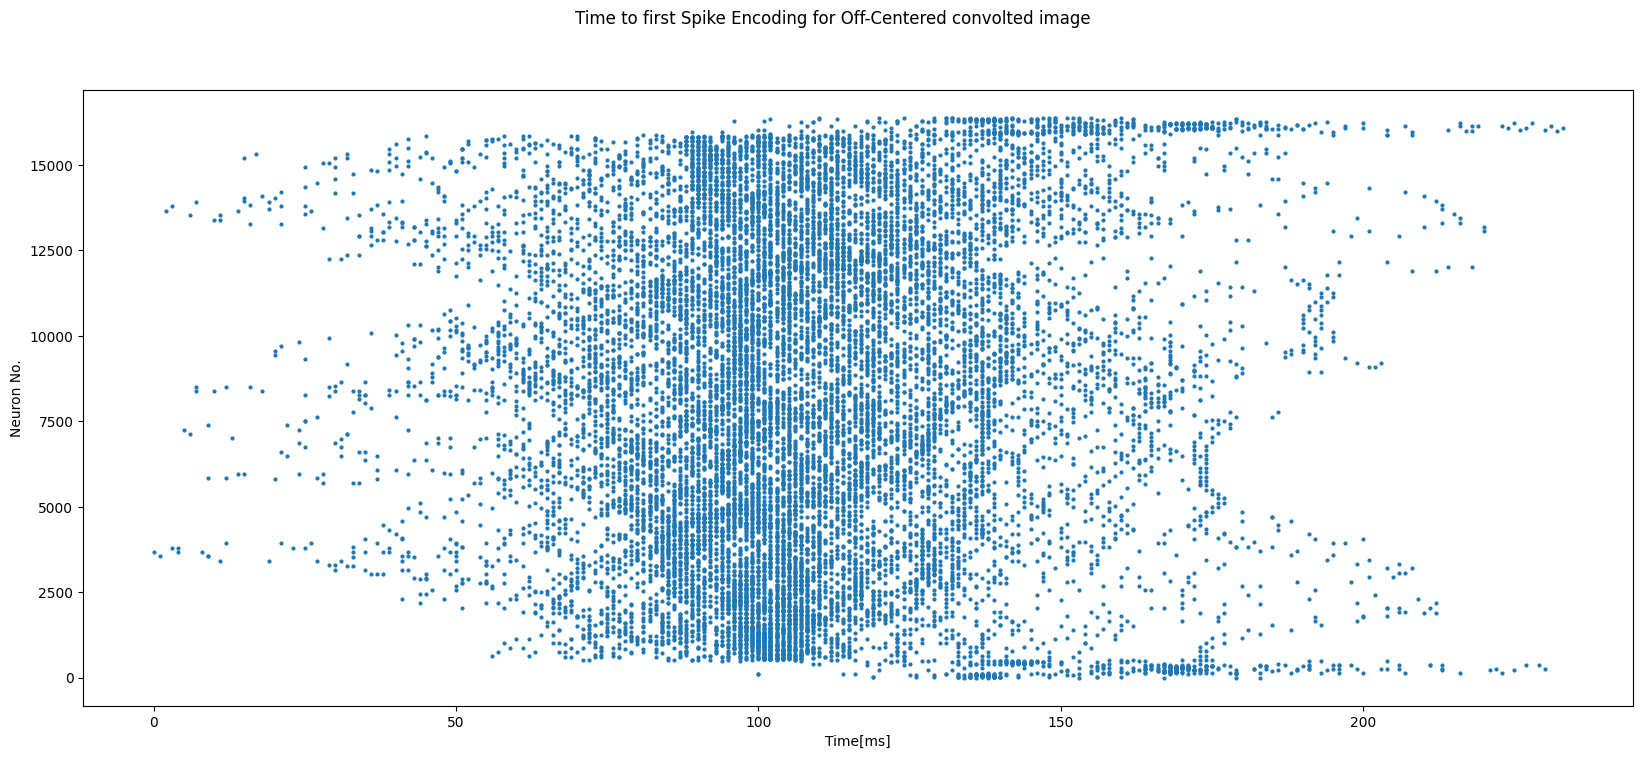

In [14]:
ttfs_offcenter = dog.ttfs(off_center.astype(int))
x , y =dog.scatter_array(ttfs_offcenter)
fig , ax = plt.subplots(1, figsize=(20, 8))
ax.scatter(x , y , s = 4);
fig.suptitle('Time to first Spike Encoding for Off-Centered convolted image')
ax.set_xlabel('Time[ms]')
ax.set_ylabel('Neuron No.');

In [15]:
dog.ttfs(off_center.astype(int)).shape

(235, 128, 128)

# Gabor Filter

In [16]:
class Gabor:
    def __init__(self, kernel_size ,theta , sigma , gamma , lamda , psi):
        self.kernel_size = kernel_size
        self.theta = theta
        self.sigma = sigma
        self.gamma = gamma
        self.lamda = lamda
        self.psi = psi
        self.pad = (self.kernel_size[0] - 1)//2
        
    def gabor_filter(self):
        (y ,x) = np.meshgrid(np.arange(int(-self.kernel_size[0]/2) , (self.kernel_size[0])//2 + 1) , np.arange(int(-self.kernel_size[1]/2) ,(self.kernel_size[1])//2 + 1))
        x_prime = x * np.cos(self.theta) + y*np.sin(self.theta)
        y_prime = self.gamma * (-x*np.sin(self.theta) + y*np.cos(self.theta))
    
        filt = np.exp(-0.5*(x_prime**2 + y_prime**2)/(2*self.sigma**2)) * np.cos(2*np.pi * x_prime/self.lamda)
        return filt
    def gabor_apply(self , img):
        filt = self.gabor_filter()
        plt.imshow(filt , cmap='gray')
        result = np.zeros(img.shape)
        pad_img = np.pad(img , pad_width=self.pad)
        for i in range(len(pad_img) - self.kernel_size[0] - 1):
            for j in range(len(pad_img) - self.kernel_size[1] - 1):
                result[i , j] = np.sum(filt * pad_img[i: i + self.kernel_size[0] , j : j + self.kernel_size[1]])
        result -= result.min()
        result /= result.max()
        result *= 255
        return result
    def ttfs(self, img):
        ttfs = []
        img_copy = img.copy()
        i = 0
        ttfs.append(np.zeros((img_copy.shape[0] , img_copy.shape[1])))
        while img_copy.max() != -INFINITY:
            tmp_max = img_copy.max()
            flat_max_index = img_copy.argmax()
            j = flat_max_index // img_copy.shape[1]
            k = flat_max_index % img_copy.shape[0]
            ttfs[i][j , k] = 1
            img_copy[j,k] = -INFINITY
            if tmp_max != img_copy.max():
                ttfs.append(np.zeros((img_copy.shape[0] , img_copy.shape[1])))
                i += 1
        ttfs = np.array(ttfs)
        return ttfs
    def scatter_array(self , ttfs):
        ttfs_reshape = ttfs.reshape(ttfs.shape[0] , ttfs.shape[1] * ttfs.shape[2])
        x = []
        y = []
        for i in range(ttfs_reshape.shape[0]):
            for j in range(ttfs_reshape.shape[1]):
                if ttfs_reshape[i , j] == 1:
                    x.append(i)
                    y.append(j)
        return x , y

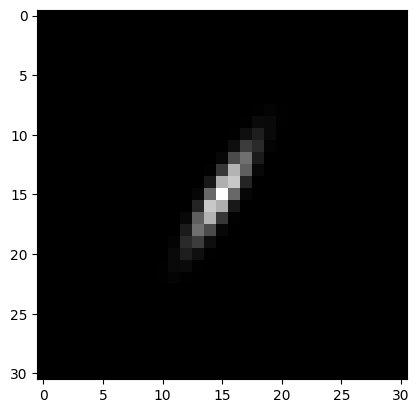

In [17]:
gabor = Gabor((31 , 31) , 45 ,0.5 ,0.25 , 10 , 0)
gabored_img = gabor.gabor_apply(img_gray)

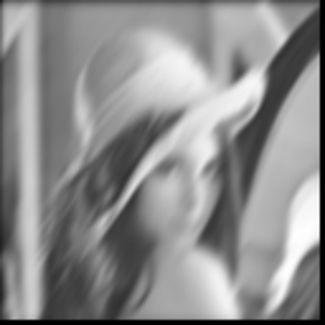

In [18]:
Image.fromarray(np.array(gabored_img).astype(np.uint8)).resize((325,325))

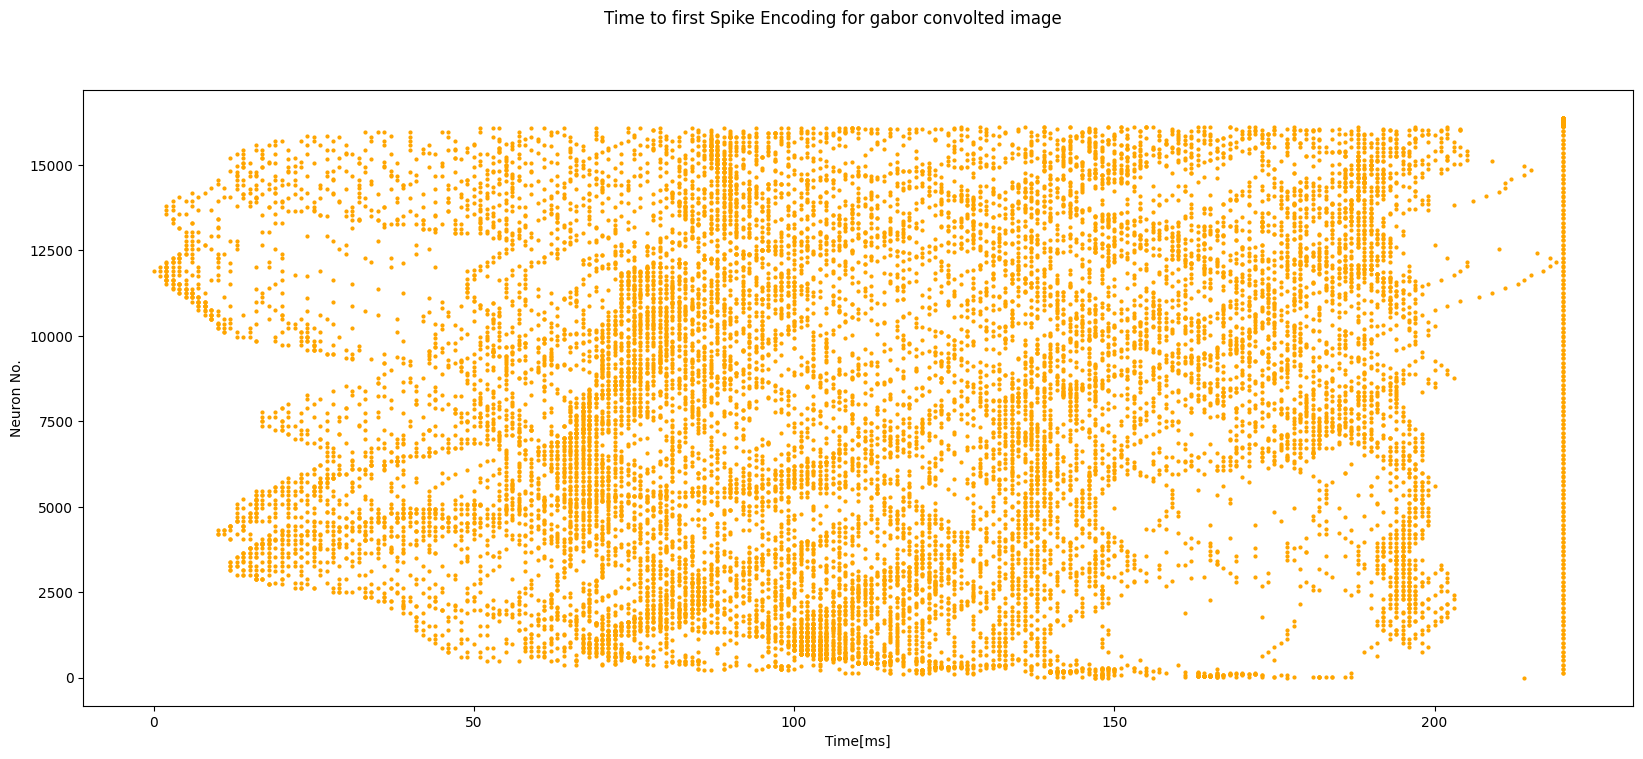

In [19]:
gabor_ttfs = gabor.ttfs(gabored_img.astype(int))
x , y = gabor.scatter_array(gabor_ttfs)
fig , ax = plt.subplots(1, figsize=(20, 8))
ax.scatter(x , y , s = 4 , color = 'orange');
fig.suptitle('Time to first Spike Encoding for gabor convolted image')
ax.set_xlabel('Time[ms]')
ax.set_ylabel('Neuron No.');